In [1]:
%matplotlib inline
# all the basic libraries that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
sns.set_style(style= 'darkgrid')

# pre-processing method
from sklearn.model_selection import train_test_split

# the regression models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import time

#tried to execte connecting to SQlserver but had issues in setting up SQL server and connection
import pyodbc

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=ASCD\SQLEXPRESS;'
                      'Database=TestDB;'
                      'Trusted_Connection=yes;')

p1data1 = pd.read_sql_query("SELECT * from p1data1", conn)
p1data2 = pd.read_sql_query("SELECT * from p1data2", conn)

In [2]:
p1data1=pd.read_csv(r'C:\Users\ascd0\Downloads\TelcomCustomer-Churn_1.csv')
p1data2=pd.read_csv(r'C:\Users\ascd0\Downloads\TelcomCustomer-Churn_2.csv')

In [3]:
p1data1.shape

(7043, 10)

In [4]:
p1data2.shape

(7043, 11)

In [5]:
p1data1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [6]:
p1data2.head(5)

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
p1data=pd.concat([p1data1,p1data2],axis=1)

In [8]:
p1data.shape

(7043, 21)

In [9]:
p1data.size

147903

In [10]:
p1data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
p1data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
p1data.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,4750-UKWJK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


We can see the unique value counts for every column...lets check what those values are

In [13]:
for i in p1data.columns:
    print(f"unique {i} values :")
    print(f"{p1data[i].unique()}\n")

unique customerID values :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

unique gender values :
['Female' 'Male']

unique SeniorCitizen values :
[0 1]

unique Partner values :
['Yes' 'No']

unique Dependents values :
['No' 'Yes']

unique tenure values :
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

unique PhoneService values :
['No' 'Yes']

unique MultipleLines values :
['No phone service' 'No' 'Yes']

unique InternetService values :
['DSL' 'Fiber optic' 'No']

unique OnlineSecurity values :
['No' 'Yes' 'No internet service']

unique OnlineBackup values :
['Yes' 'No' 'No internet service']

unique DeviceProtection values :
['No' 'Yes' 'No internet service']

unique TechSupport values :
['No' 'Yes' 'No internet service']

unique StreamingTV values :
['No' 'Yes' 'No intern

In [14]:
p1data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


from unique values we can understand Tenure,TotalCharges and monthly charges have numerical data and remaining vairlbles hold category data i.e. yes/no except SeniorCitizen

Tenure and Monthly charges have correct dtypes. Need to convert Total charges to Float dtype.
SeniorCitizen have to be converted to object from int and replace data with 0 as No and 1 as Yes

In [15]:
p1data['TotalCharges'] = pd.to_numeric(p1data['TotalCharges'], errors='coerce')
p1data['SeniorCitizen'] = p1data['SeniorCitizen'].replace([0,1],['No','Yes'])
p1data['SeniorCitizen'] = p1data['SeniorCitizen'].astype('object')

In [16]:
print(p1data['SeniorCitizen'].dtype)
print(p1data['TotalCharges'].dtype)

object
float64


In [17]:
p1data['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
p1data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [19]:
p1data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#We have some null values in TotalCharges column....As there are only 11 rows deleting the data

And no real use with CustomerID as well.So dropping CusotmerID column.

In [20]:
#removing the missing values rows
p1data.dropna(inplace=True)

In [21]:
#dropped CusotmerID column
p1data.drop('customerID',axis=1,inplace=True)

# Automate all above steps

In [22]:
p1data_x=pd.concat([p1data1,p1data2],axis=1)

In [23]:
p1data_x.size

147903

In [24]:
p1data_x.shape

(7043, 21)

In [25]:
p1data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
p1data_x.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [27]:
p1data_x.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,4750-UKWJK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [28]:
from datacleaner import autoclean
p1data_clean=autoclean(p1data_x)

In [29]:
p1data_clean.shape

(7043, 21)

In [30]:
p1data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [31]:
p1data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
customerID,7043.0,3521.000000,2033.283305,0.00,1760.5,3521.00,5281.50,7042.00
gender,7043.0,0.504756,0.500013,0.00,0.0,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.0,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.0,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.0,1.00,2.00,2.00


In [32]:
p1data_clean.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

AUtoclean has converted all object Dtypes to numerical and replaced null values with mean values

In [33]:
p1data_clean.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


# statistical analysis

In [34]:
p1data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


People are having average tenure of 32.42 and have monthly charges of 64.79 and total charges of 2283.30

Mean and std are varying moderately. Varaibles have moderate volatality.

In [35]:
p1data.describe(include='object').T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,No,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


Major Highlights:
Gender - High male users are there with frequencey of 3549
Senior Citizen - Most of them are not senior citizens.
Phone Service - Majority people has phone service
Internet Service - most people are using Fiber Optic than DSL.
Contract - majority people are using MOnth to month contracts
PaperlessBilling - majority people opeted for paperlessBilling
Payment Method - Majority people are paying using Electronic check method
Churn - Majority people are not churning 

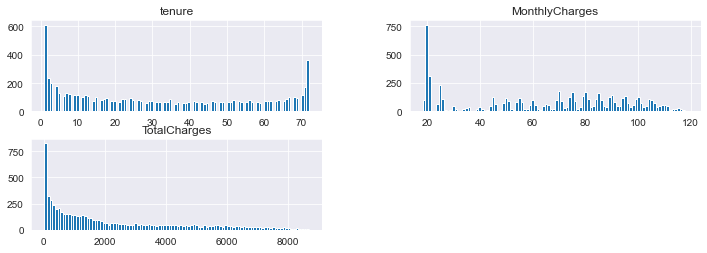

In [36]:
columns = list(p1data) 
p1data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

Tenure - majority people are with company for less tenure means people churned in first few months itself and few cusotmers are with company for longer tenure
Monthly Charges - Seems like new customers are charged more than the old customers
Total charges - Data is RIght skewed..Majority people have less Totalcharges as people churned in initial months itself due to various reasons

<AxesSubplot:>

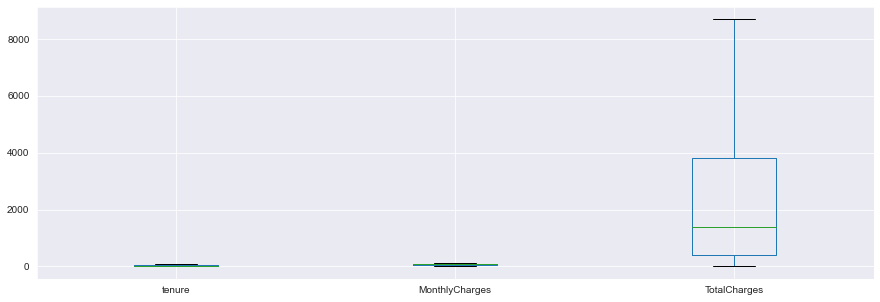

In [37]:
p1data.boxplot(figsize=(15,5))

Seems like Total charges data is rightskewed. few people have high total charges compared to others

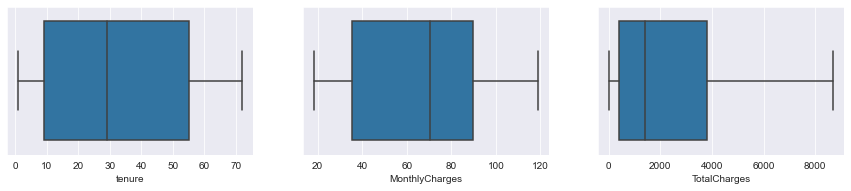

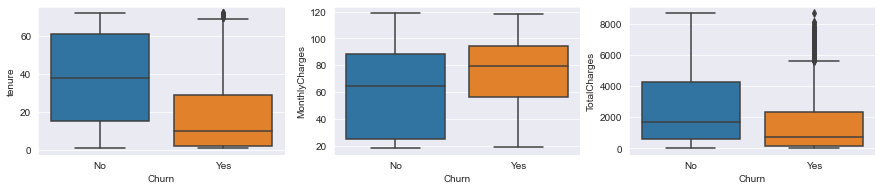

In [39]:
count=1
list=['tenure','MonthlyCharges','TotalCharges']
plt.subplots(figsize=(15, 6))
for col in list:
    plt.subplot(2,3,count)
    sns.boxplot(x=p1data[col])
    count+=1

plt.show()

count=1
list=['tenure','MonthlyCharges','TotalCharges']
plt.subplots(figsize=(15, 6))
for col in list:
    plt.subplot(2,3,count)
    sns.boxplot(x=p1data['Churn'],y=p1data[col])
    count+=1

plt.show()

Tenure - People who are churning have average tenure of around 10 months compared to Non-churners(20 months)
Monthly charges - People who are chaurning have high avg monthly charges of 80 compared to non-churners avergae of 65
TotaL charges - computed based on Tenure and Monthly charges. People who are churning have lot of outliers

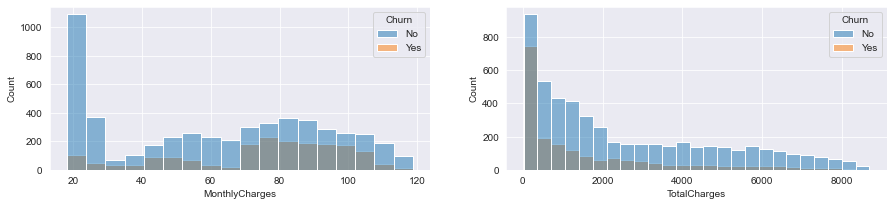

In [40]:
count=1
list=['MonthlyCharges', 'TotalCharges']
plt.subplots(figsize=(15, 3))
for col in list:
    plt.subplot(1,2,count)
    sns.histplot(x=p1data[col],hue=p1data.Churn)
    count+=1

plt.show()

People are churning high when monthly charges are high...Most data ranges in 80-100
People are churning high when Total Charges are low....Most data lies in range of 0-1500

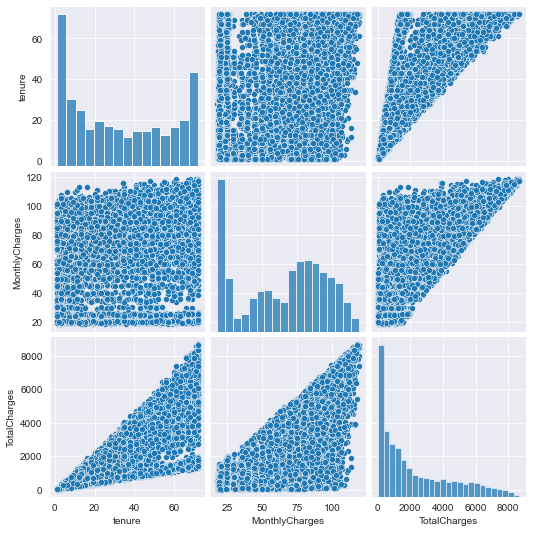

In [41]:
sns.pairplot(p1data)

In [42]:
#TotalCharges is linearly with Tenure and Monthy charges

<AxesSubplot:xlabel='Churn', ylabel='count'>

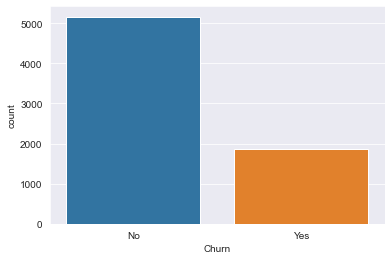

In [43]:
sns.countplot(x=p1data['Churn'])

In [44]:
p1data['Churn'].value_counts()

#churn column data is highly imbalanced

No     5163
Yes    1869
Name: Churn, dtype: int64

In [45]:
p1data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

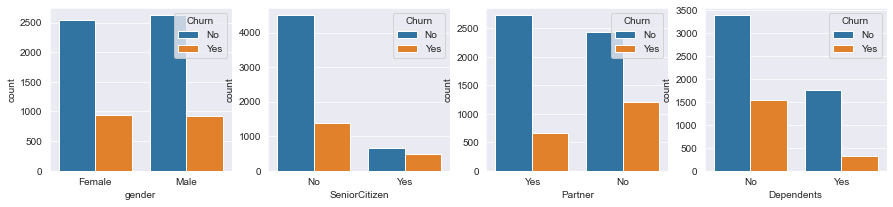

In [46]:
count=1
list=['gender', 'SeniorCitizen', 'Partner', 'Dependents']
plt.subplots(figsize=(15, 3))
for col in list:
    plt.subplot(1,4,count)
    sns.countplot(x=p1data[col],hue=p1data.Churn)
    count+=1

plt.show()


Gender - Male people are churning more than females
Senior citizen - Most people are not senior citizen and they are churning more than actual senior citizens
Partner - People who dont have partners are churning more than who have partners
Dependents - People who dont have dependents are churning more than people woh have dependents

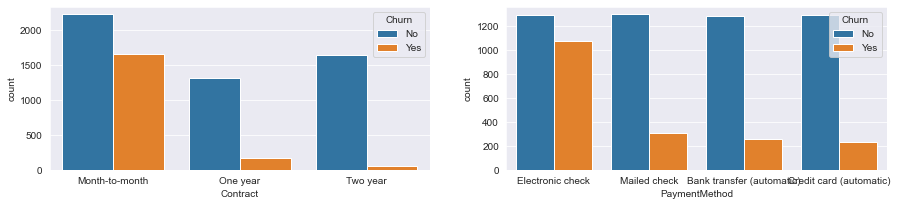

In [47]:
count=1
list=['Contract', 'PaymentMethod']
plt.subplots(figsize=(15, 3))
for col in list:
    plt.subplot(1,2,count)
    sns.countplot(x=p1data[col],hue=p1data.Churn)
    count+=1
plt.show()


Contract - Month to MOnth contrat people are higher in data.They are only churning hihger than long term customers
Payment Method - people who are using Electronice check are churning higher than other payment modes(Mailed Check,BankTransfer,Creditcard) 

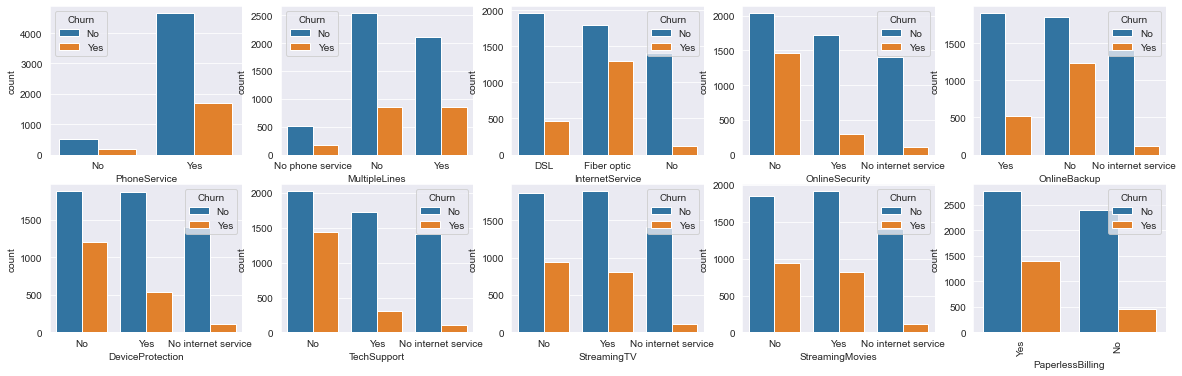

In [48]:
count=1
list1=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling']
plt.subplots(figsize=(20, 6))
for col in list1:
    plt.subplot(2,5,count)
    sns.countplot(x=p1data[col],hue=p1data.Churn)
    count+=1
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

PhoneService - people who has phoneserivce and having multiple lines are churning more than people who dont have phone service

Internet Service - People who use Fiberoptic are churning more than others.

People who dont use online security,onlinebackup,deviceprotection,Techsupport,StreamingTV,streaming Movies services are churning higher than others

PaperBilling - People Who opted for Paperless Billing are churning more than others.

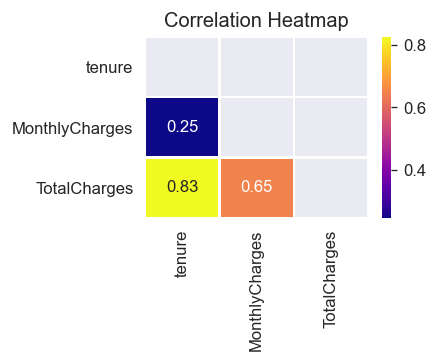

In [49]:
sns.set_style('darkgrid')
plt.figure(dpi = 120,figsize= (3,2))
mask = np.triu(np.ones_like(p1data.corr(),dtype = bool))
sns.heatmap(p1data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

# • Segregate predictors vs target attributes

In [50]:
p1data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Target Varible is Churn

Predictor Varibles are 
     DemoGraphic info -  'gender', 'SeniorCitizen', 'Partner', 'Dependents'
     Services info - 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',        'TechSupport', 'StreamingTV','StreamingMovies', 
     Accounting info - 'Contract', 'PaperlessBilling', 'PaymentMethod','MonthlyCharges', 'TotalCharges','Tenure'

gender , SeniorCitizen , Partner, Dependents, PhoneService, PaperlessBilling Variables are having Yes or NO. Can be converted to numericals using LabelEncoder

Below Predictor variables are having more than 2 categorical values and need to be replacced with dummies.

MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection,TechSupport,StreamingTV, StreamingMovies,Contract,PaymentMethod

'MonthlyCharges', 'TotalCharges','Tenure' - Need to apply 

In [51]:
# Converting string boolean to numeric boolean
p1data['PhoneService']=p1data['PhoneService'].map({'Yes':1,'No':0})
p1data['PaperlessBilling'] =p1data['PaperlessBilling'].map({'Yes':1,'No':0})
p1data['Churn'] =p1data['Churn'].map({'Yes':1,'No':0})
p1data['Partner'] = p1data['Partner'].map({'Yes':1,'No':0})
p1data['Dependents']=p1data['Dependents'].map({'Yes':1,'No':0})
p1data['SeniorCitizen']=p1data['SeniorCitizen'].map({'Yes':1,'No':0})
p1data['gender']=p1data['gender'].map({'Female':1,'Male':0})
p1data['MultipleLines']=p1data['MultipleLines'].map({'Yes':1,'No':0,'No phone service':-1})
p1data['InternetService']=p1data['InternetService'].map({'DSL':1,'No':0,'Fiber optic':2})
p1data['OnlineSecurity']=p1data['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':-1})
p1data['OnlineBackup']=p1data['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':-1})
p1data['DeviceProtection']=p1data['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':-1})
p1data['TechSupport']=p1data['TechSupport'].map({'Yes':1,'No':0,'No internet service':-1})
p1data['StreamingTV']=p1data['StreamingTV'].map({'Yes':1,'No':0,'No internet service':-1})
p1data['StreamingMovies']=p1data['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':-1})
p1data['Contract']=p1data['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
p1data['PaymentMethod']=p1data['PaymentMethod'].map({'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3, 
                                                     'Credit card (automatic)':4})

In [52]:
p1data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,-1,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,2,53.85,108.15,1
3,0,0,0,0,45,0,-1,1,1,0,1,1,0,0,1,0,3,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,2,84.80,1990.50,0
7039,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,4,103.20,7362.90,0
7040,1,0,1,1,11,0,-1,1,1,0,0,0,0,0,0,1,1,29.60,346.45,0
7041,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,2,74.40,306.60,1


In [53]:
p1data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,-1,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,2,53.85,108.15,1
3,0,0,0,0,45,0,-1,1,1,0,1,1,0,0,1,0,3,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [54]:
p1data["Churn"].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

<AxesSubplot:>

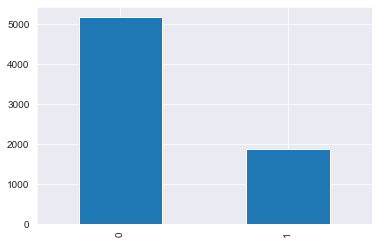

In [55]:
pd.value_counts(p1data["Churn"]).plot(kind="bar")

Target Variable have 73.42% of non-churners and 26.57% of churners...Data is slightly imbalanced...No need to balance.

In [56]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
col_names = p1data.columns
scaler = MinMaxScaler(feature_range = (0,1))
p1data_mm = scaler.fit_transform(p1data)
p1data_mm = pd.DataFrame(p1data_mm, columns=col_names)

In [57]:
p1data_mm

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.0,1.0,0.000000,0.115423,0.001275,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.5,0.5,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.333333,0.385075,0.215867,0.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,0.5,0.5,1.0,1.0,0.5,0.5,0.5,0.5,0.0,1.0,0.333333,0.354229,0.010310,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.5,1.0,0.5,1.0,1.0,0.5,0.5,0.5,0.0,0.666667,0.239303,0.210241,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.000000,0.521891,0.015330,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,1.0,1.0,0.323944,1.0,1.0,0.5,1.0,0.5,1.0,1.0,1.0,1.0,0.5,1.0,0.333333,0.662189,0.227521,0.0
7028,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.5,1.0,1.0,0.5,1.0,1.0,0.5,1.0,1.000000,0.845274,0.847461,0.0
7029,1.0,0.0,1.0,1.0,0.140845,0.0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.000000,0.112935,0.037809,0.0
7030,0.0,1.0,1.0,0.0,0.042254,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.333333,0.558706,0.033210,1.0


In [58]:
#spilt X and y

X=p1data_mm.drop(['Churn'],axis=1)
y=p1data_mm['Churn']

In [59]:
#split data into Train and Test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [60]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (4922, 19)
y_train shape:  (4922,)
x_test shape:  (2110, 19)
y_test shape:  (2110,)


In [61]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(p1data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(p1data.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [62]:
print("Original Churn True Values    : {0} ({1:0.2f}%)".format(len(p1data.loc[p1data['Churn'] == 1]), (len(p1data.loc[p1data['Churn'] == 1])/len(p1data.index)) * 100))
print("Original Churn False Values   : {0} ({1:0.2f}%)".format(len(p1data.loc[p1data['Churn'] == 0]), (len(p1data.loc[p1data['Churn'] == 0])/len(p1data.index)) * 100))
print("")
print("Training Churn True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Churn False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Churn True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Churn False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Churn True Values    : 1869 (26.58%)
Original Churn False Values   : 5163 (73.42%)

Training Churn True Values    : 1308 (26.57%)
Training Churn False Values   : 3614 (73.43%)

Test Churn True Values        : 561 (26.59%)
Test Churn False Values       : 1549 (73.41%)



In [63]:
#define a function to plot confusion matrix
def confusion_matrix_plot(x_train,y_train,x_test,y_test,classifier,y_pred,classifier_name):
    fig,ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier,x_test,y_test,display_labels=["No Churn","Churn"],normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - confusion matrix')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test,y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(x_train,y_train)}')
    return print("")

In [64]:
#define a function to plot ROC curve and AUC score
def roc_curve_auc_score(x_test,y_test,y_pred_prob,classifier_name):
    y_pred_proba = y_pred_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel("false positive Rate")
    plt.ylabel("True positive Rate")
    plt.title(f'{classifier_name} - ROC curve')
    plt.show()
    global score
    score = roc_auc_score(y_test, y_pred_proba)
    return print(f'AUC SCore (ROC): {score} \n')

In [65]:
#define a function to plot precision recall curve and F1 score and AUC score

def precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob,classifier_name):
    y_pred_proba = y_pred_prob[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f'{classifier_name} - Precision Recall curve')
    plt.show()
    global f1_score_result,auc_score_result
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')
    

# 5. Model training, testing and tuning:

In [88]:
#Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [89]:
#scoring decision Tree

print('accuracy score of decision tree Train set is',dTree.score(x_train, y_train))
print('accuracy score of decision tree Test set is', dTree.score(x_test, y_test))

accuracy score of decision tree Train set is 0.9973587972368956
accuracy score of decision tree Test set is 0.7194312796208531


In [90]:
#Training set score is almost about to 1 where as Test set score is about 72.7%

In [91]:
#Reducing Overfitting

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)

print('accuracy score of Pruned decision tree Train set is', dTreeR.score(x_train, y_train))
print('accuracy score of Pruned decision tree Test  set is',dTreeR.score(x_test, y_test))

accuracy score of Pruned decision tree Train set is 0.7927671678179602
accuracy score of Pruned decision tree Test  set is 0.7834123222748816


In [92]:
#with pruning by including max_depth=3, Got trainig score of 79.27 and Testing score of 78.34

<AxesSubplot:>

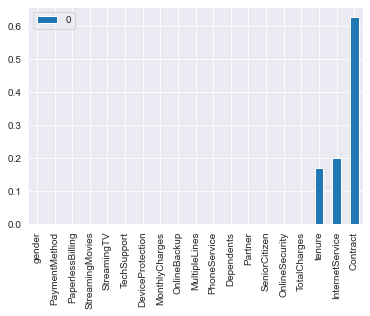

In [93]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

#print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))
weights= pd.DataFrame(dTreeR.feature_importances_, index = x_train.columns)
weights.sort_values(by=0).plot(kind = 'bar')

#From above we can understand important features are 

Contract                                                        
tenure                                                     
InternetService             

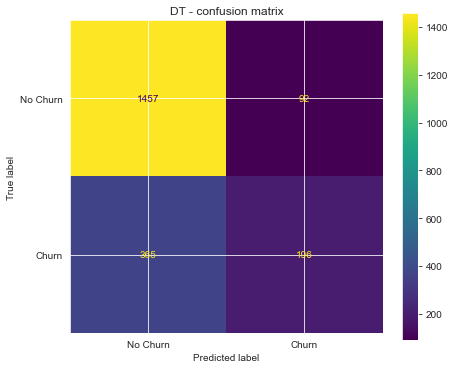

Accuracy Score Test: 0.7834123222748816
Accuracy Score Train: 0.7927671678179602



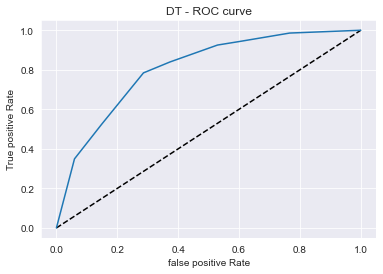

AUC SCore (ROC): 0.8061937492879657 



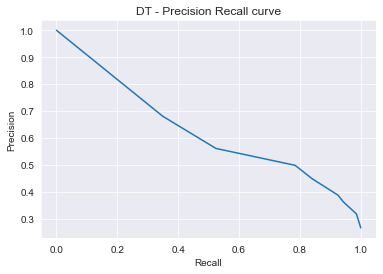

F1 score: 0.4617196702002356 
AUC Score (PR): 0.627229594528156



In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = dTreeR.predict(x_test)
y_pred_prob = dTreeR.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, dTreeR, y_pred, 'DT')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'DT')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'DT')

In [95]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': [dTreeR.score(x_train, y_train)],'Test accuracy':[dTreeR.score(x_test,y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

,Method,Train accuracy,Test accuracy,ROC AUC Score,F1 Score,PR AUC_Score
0,Decision Tree,0.792767,0.783412,0.806194,0.46172,0.62723


# Random Forest Tree

In [96]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

print('accuracy score of Random Forest tree Train set is', rfcl.score(x_train, y_train))
print('accuracy score of Random Forest tree Test  set is',rfcl.score(x_test, y_test))

accuracy score of Random Forest tree Train set is 0.9965461194636327
accuracy score of Random Forest tree Test  set is 0.7895734597156399


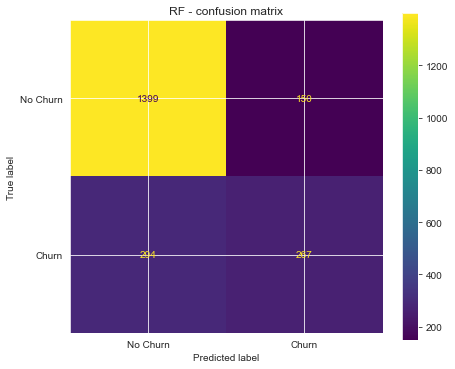

Accuracy Score Test: 0.7895734597156399
Accuracy Score Train: 0.9965461194636327



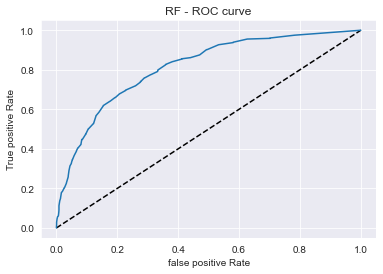

AUC SCore (ROC): 0.8127185729623736 



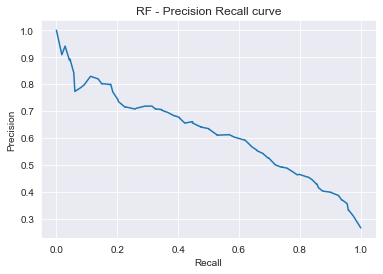

F1 score: 0.5460122699386503 
AUC Score (PR): 0.6175055017984489



In [97]:
y_pred = rfcl.predict(x_test)
y_pred_prob = rfcl.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, rfcl, y_pred, 'RF')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'RF')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'RF')

In [98]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'],'Train accuracy': [rfcl.score(x_train, y_train)], 'Test accuracy': [rfcl.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

,Method,Train accuracy,Test accuracy,ROC AUC Score,F1 Score,PR AUC_Score
0,Decision Tree,0.792767,0.783412,0.806194,0.461720,0.627230
0,Random Forest,0.996546,0.789573,0.812719,0.546012,0.617506


Compared to Decision Tree, accuracy has increased little with random Forest

# Ensemble Learning - Bagging

In [99]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

print('accuracy score of Bagging Train set is', bgcl.score(x_train, y_train))
print('accuracy score of Bagging Test  set is', bgcl.score(x_test, y_test))

accuracy score of Bagging Train set is 0.9967492889069484
accuracy score of Bagging Test  set is 0.7819905213270142


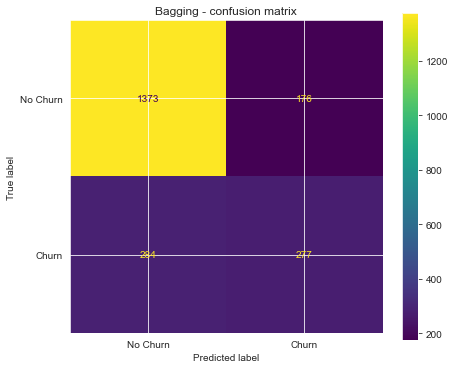

Accuracy Score Test: 0.7819905213270142
Accuracy Score Train: 0.9967492889069484



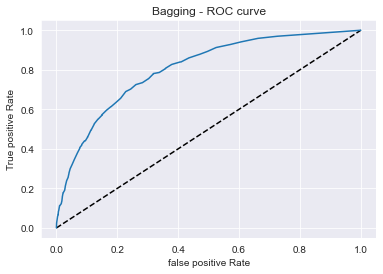

AUC SCore (ROC): 0.8047788867292913 



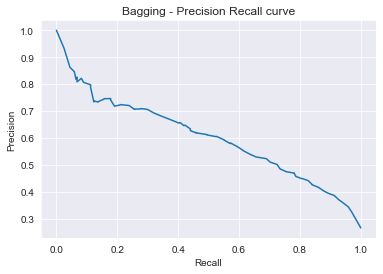

F1 score: 0.5463510848126232 
AUC Score (PR): 0.60188942705476



In [100]:
y_pred = bgcl.predict(x_test)
y_pred_prob = bgcl.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, bgcl, y_pred, 'Bagging')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'Bagging')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'Bagging')

In [101]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'],'Train accuracy': [bgcl.score(x_train, y_train)], 'Test accuracy': [bgcl.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

,Method,Train accuracy,Test accuracy,ROC AUC Score,F1 Score,PR AUC_Score
0,Decision Tree,0.792767,0.783412,0.806194,0.461720,0.627230
0,Random Forest,0.996546,0.789573,0.812719,0.546012,0.617506
0,Bagging,0.996749,0.781991,0.804779,0.546351,0.601889


Accuracy has been decreased with Bagging Technique

# Adaboost Ensemble Algorithm

In [102]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)

print('accuracy score of AdaBoost Train set is', abcl.score(x_train, y_train))
print('accuracy score of AdaBoost Test  set is', abcl.score(x_test, y_test))

accuracy score of AdaBoost Train set is 0.8045509955302722
accuracy score of AdaBoost Test  set is 0.7990521327014218


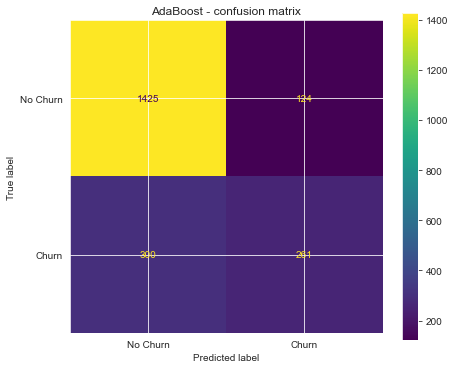

Accuracy Score Test: 0.7990521327014218
Accuracy Score Train: 0.8045509955302722



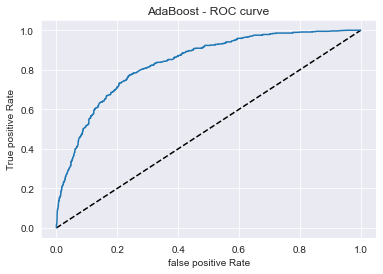

AUC SCore (ROC): 0.8362649009366057 



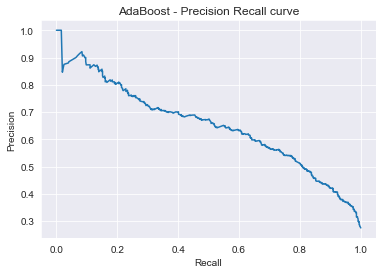

F1 score: 0.5517970401691332 
AUC Score (PR): 0.652038850576486



In [103]:
y_pred = abcl.predict(x_test)
y_pred_prob = abcl.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, abcl, y_pred, 'AdaBoost')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'AdaBoost')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'AdaBoost')

In [104]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'],'Train accuracy': [abcl.score(x_train, y_train)], 'Test accuracy': [abcl.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

,Method,Train accuracy,Test accuracy,ROC AUC Score,F1 Score,PR AUC_Score
0,Decision Tree,0.792767,0.783412,0.806194,0.461720,0.627230
0,Random Forest,0.996546,0.789573,0.812719,0.546012,0.617506
0,Bagging,0.996749,0.781991,0.804779,0.546351,0.601889
0,AdaBoost,0.804551,0.799052,0.836265,0.551797,0.652039


# GradientBoost Classifier Algorithm

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)

print('accuracy score of GradientBoost Train set is', gbcl.score(x_train, y_train))
print('accuracy score of GradientBoost Test  set is', gbcl.score(x_test, y_test))

accuracy score of GradientBoost Train set is 0.819585534335636
accuracy score of GradientBoost Test  set is 0.8014218009478673


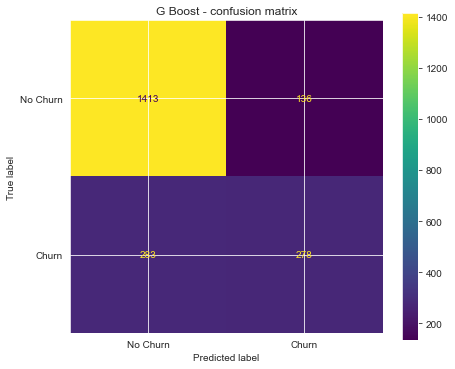

Accuracy Score Test: 0.8014218009478673
Accuracy Score Train: 0.819585534335636



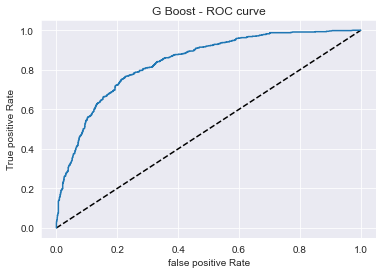

AUC SCore (ROC): 0.8388846118880676 



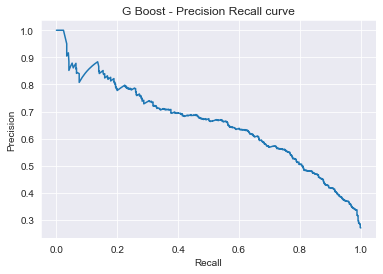

F1 score: 0.5702564102564103 
AUC Score (PR): 0.6556976542744525



In [106]:
y_pred = gbcl.predict(x_test)
y_pred_prob = gbcl.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, gbcl, y_pred, 'G Boost')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'G Boost')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'G Boost')

In [107]:
tempResultsDf = pd.DataFrame({'Method':['GradientBoost'],'Train accuracy': [gbcl.score(x_train, y_train)], 'Test accuracy': [gbcl.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

,Method,Train accuracy,Test accuracy,ROC AUC Score,F1 Score,PR AUC_Score
0,Decision Tree,0.792767,0.783412,0.806194,0.461720,0.627230
0,Random Forest,0.996546,0.789573,0.812719,0.546012,0.617506
0,Bagging,0.996749,0.781991,0.804779,0.546351,0.601889
0,AdaBoost,0.804551,0.799052,0.836265,0.551797,0.652039
0,GradientBoost,0.819586,0.801422,0.838885,0.570256,0.655698


ADA Boost and Gradient Boost perfomred well. with GradientBoost got highest accuracy of 80.56%

# XGBoost

pip install xgboost

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(x_train, y_train)

print('accuracy score of XGBoost Train set is', xgb.score(x_train, y_train))
print('accuracy score of XGBoost Test  set is', xgb.score(x_test, y_test))

[19:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score of XGBoost Train set is 0.94819179195449
accuracy score of XGBoost Test  set is 0.7867298578199052


C:\Users\ascd0\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


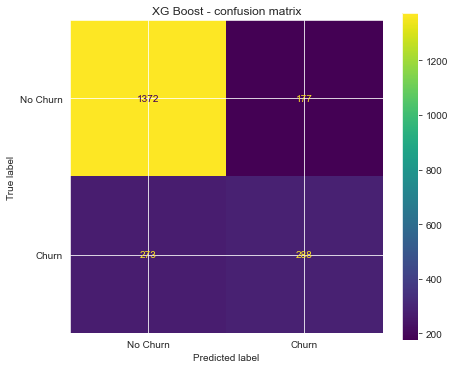

Accuracy Score Test: 0.7867298578199052
Accuracy Score Train: 0.94819179195449



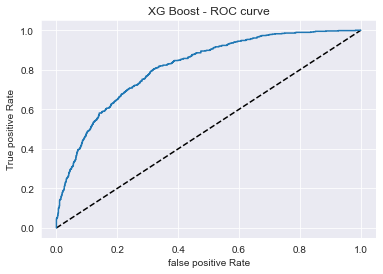

AUC SCore (ROC): 0.8136058108905866 



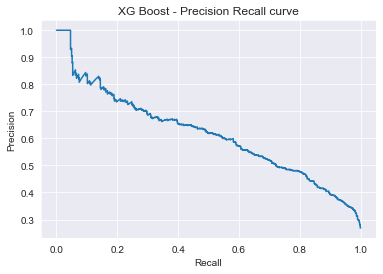

F1 score: 0.5614035087719298 
AUC Score (PR): 0.6163774838803706



In [109]:
y_pred = xgb.predict(x_test)
y_pred_prob = xgb.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, xgb, y_pred, 'XG Boost')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'XG Boost')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'XG Boost')

In [110]:
tempResultsDf = pd.DataFrame({'Method':['XgBoost'],'Train accuracy': [xgb.score(x_train, y_train)], 'Test accuracy': [xgb.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

C:\Users\ascd0\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,Method,Train accuracy,Test accuracy,ROC AUC Score,F1 Score,PR AUC_Score
0,Decision Tree,0.792767,0.783412,0.806194,0.461720,0.627230
0,Random Forest,0.996546,0.789573,0.812719,0.546012,0.617506
0,Bagging,0.996749,0.781991,0.804779,0.546351,0.601889
0,AdaBoost,0.804551,0.799052,0.836265,0.551797,0.652039
0,GradientBoost,0.819586,0.801422,0.838885,0.570256,0.655698
0,XgBoost,0.948192,0.786730,0.813606,0.561404,0.616377


Out of all ensamble techniques GradientBoost Technique performed well and has accuracy of 80.14%

# Hyper Parameter Tuning

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Create the random grid
random_grid = {'n_estimators': np.arange(10,2000,10),
               'max_features': ['auto','sqrt'],
               'max_depth': np.arange(10,200,10),
               'min_samples_split': [2, 5, 10]
              }

# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()

# Random search of parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=0, random_state=42)
# Fit the random search model
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  210,  220,
        230,  240,  250,  260,  270,  2...
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540,
       1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650,
       1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760,
       1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870,
       1880, 1890,

In [114]:
print('Random forest - Best Parameters: ',rf_random.best_params_)

Random forest - Best Parameters:  {'n_estimators': 650, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 10}


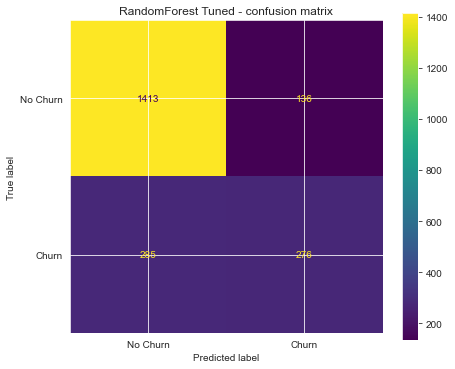

Accuracy Score Test: 0.8004739336492891
Accuracy Score Train: 0.878707842340512



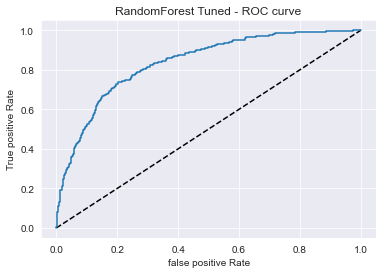

AUC SCore (ROC): 0.8357136856738117 



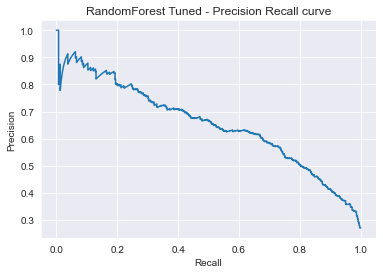

F1 score: 0.5673175745118191 
AUC Score (PR): 0.6537418175627641



In [115]:
y_pred = rf_random.predict(x_test)
y_pred_prob = rf_random.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, rf_random, y_pred, 'RandomForest Tuned')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'RandomForest Tuned')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'RandomForest Tuned')

In [116]:
print('Train accuracy of RandomForest random Tuned set is ',rf_random.score(x_train, y_train))
print('Test accuracy of RandomForest random Tuned set is ',rf_random.score(x_test, y_test))

Train accuracy of RandomForest random Tuned set is  0.878707842340512
Test accuracy of RandomForest random Tuned set is  0.8004739336492891


In [117]:
tempResultsDf = pd.DataFrame({'Method':['RF Tuned Random'],'Train accuracy': [rf_random.score(x_train, y_train)], 'Test accuracy': [rf_random.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

,Method,Train accuracy,Test accuracy,ROC AUC Score,F1 Score,PR AUC_Score
0,Decision Tree,0.792767,0.783412,0.806194,0.461720,0.627230
0,Random Forest,0.996546,0.789573,0.812719,0.546012,0.617506
0,Bagging,0.996749,0.781991,0.804779,0.546351,0.601889
0,AdaBoost,0.804551,0.799052,0.836265,0.551797,0.652039
0,GradientBoost,0.819586,0.801422,0.838885,0.570256,0.655698
0,XgBoost,0.948192,0.786730,0.813606,0.561404,0.616377
0,RF Tuned Random,0.878708,0.800474,0.835714,0.567318,0.653742


With HyperParameter Tuning using RandomsearchCV for RandomForest accuracy has been increased from 78.95 to 80.04%

In [118]:
#GRID SEARCH CV

In [119]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
rf_grid.fit(x_train,y_train)
rf_grid.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 16.5min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

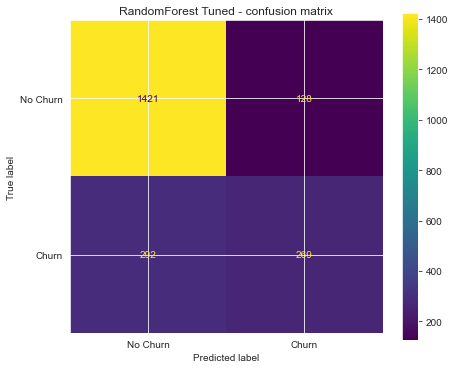

Accuracy Score Test: 0.8009478672985783
Accuracy Score Train: 0.8626574563185697



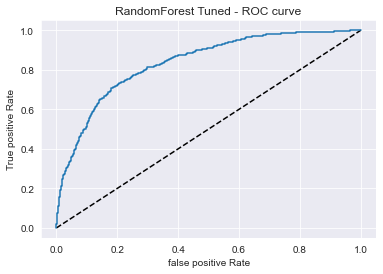

AUC SCore (ROC): 0.8354052813096597 



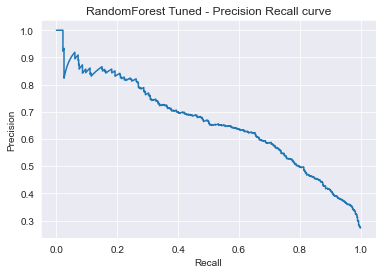

F1 score: 0.5615866388308977 
AUC Score (PR): 0.6589938560131475



In [120]:
y_pred = rf_grid.predict(x_test)
y_pred_prob = rf_grid.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, rf_grid, y_pred, 'RandomForest Tuned')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'RandomForest Tuned')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'RandomForest Tuned')

In [121]:
tempResultsDf = pd.DataFrame({'Method':['RF Tuned Grid'],'Train accuracy': [rf_grid.score(x_train, y_train)], 'Test accuracy': [rf_grid.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

,Method,Train accuracy,Test accuracy,ROC AUC Score,F1 Score,PR AUC_Score
0,Decision Tree,0.792767,0.783412,0.806194,0.461720,0.627230
0,Random Forest,0.996546,0.789573,0.812719,0.546012,0.617506
0,Bagging,0.996749,0.781991,0.804779,0.546351,0.601889
0,AdaBoost,0.804551,0.799052,0.836265,0.551797,0.652039
0,GradientBoost,0.819586,0.801422,0.838885,0.570256,0.655698
0,XgBoost,0.948192,0.786730,0.813606,0.561404,0.616377
0,RF Tuned Random,0.878708,0.800474,0.835714,0.567318,0.653742
0,RF Tuned Grid,0.862657,0.800948,0.835405,0.561587,0.658994


In [ ]:
#Accuracy has been increased with GridserachCV for randomforest from 78.95 to 80.09%

ROC Curve: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)

AUC (for ROC): Measures the overall separability between classes of the model related to the ROC curve

Precision-Recall-Curve: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance

F1 Score: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.

AUC (for PRC): Measures the overall separability between classes of the model related to the Precision-Recall curve

By Lookng at above table parameters,Gradient Boost can be selected as best model as it showed good Test accuracy and Higher AUC ROC,F1 score and PR AUC score

# Pickle trained model for future use

In [122]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(gbcl)
  
# Load the pickled model
gbcl_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
gbcl_from_pickle.predict(x_test)

array([0., 0., 0., ..., 0., 1., 1.])

# GUI application

In [133]:
from tkinter import *
from tkinter import ttk
w = Tk()
w.title("GUI")
w.geometry('300x550')
w.configure(background = "WHITE");

f1 = Label(w ,text = "Gender").grid(sticky = W,row = 0,column = 0,pady=2)
f1_var=tk.StringVar()
e1 = ttk.Combobox(w,textvariable=f1_var,width=16)
e1['values'] = ('Male','Female')
e1.current(0)
e1.grid(row = 0,column = 1)

f2 = Label(w ,text = "Senior Citizen").grid(sticky = W,row = 1,column = 0,pady=2)
f2_var=tk.StringVar()
e2 = ttk.Combobox(w,textvariable=f2_var,width=16)
e2['values'] = (1,0)
e2.current(0)
e2.grid(row = 1,column = 1)

f3 = Label(w ,text = "Partner").grid(sticky = W,row = 2,column = 0,pady=2)
f3_var=tk.StringVar()
e3 = ttk.Combobox(w,textvariable=f3_var,width=16)
e3['values'] = ('Yes','No')
e3.current(0)
e3.grid(row = 2,column = 1)

f4 = Label(w ,text = "Dependents").grid(sticky = W,row = 3,column = 0,pady=2)
f4_var=tk.StringVar()
e4 = ttk.Combobox(w,textvariable=f4_var,width=16)
e4['values'] = ('Yes','No')
e4.current(0)
e4.grid(row = 3,column = 1)

f5 = Label(w ,text = "Tenure").grid(sticky = W,row = 4,column = 0,pady=2)
f5_var=tk.StringVar()
e5 = ttk.Entry(w,textvariable=f5_var,width=19)
e5.grid(row = 4,column = 1)

f6 = Label(w ,text = "Phone Service").grid(sticky = W,row = 5,column = 0,pady=2)
f6_var=tk.StringVar()
e6 = ttk.Combobox(w,textvariable=f6_var,width=16)
e6['values'] = ('Yes','No')
e6.current(0)
e6.grid(row = 5,column = 1)

f7 = Label(w ,text = "Multiple Lines").grid(sticky = W,row = 6,column = 0,pady=2)
f7_var=tk.StringVar()
e7 = ttk.Combobox(w,textvariable=f7_var,width=16)
e7['values'] = ('Yes','No',"No Phone Service")
e7.current(0)
e7.grid(row = 6,column = 1)

f8 = Label(w ,text = "Internet Service").grid(sticky = W,row = 7,column = 0,pady=2)
f8_var=tk.StringVar()
e8 = ttk.Combobox(w,textvariable=f8_var,width=16)
e8['values'] = ('DSL','FiberOptic','No')
e8.current(0)
e8.grid(row = 7,column = 1)

f9 = Label(w ,text = "online Security ").grid(sticky = W,row = 8,column = 0,pady=2)
f9_var=tk.StringVar()
e9 = ttk.Combobox(w,textvariable=f9_var,width=16)
e9['values'] = ('Yes','No',"No Internet Service")
e9.current(0)
e9.grid(row = 8,column = 1)

f10 = Label(w ,text = "online Backup").grid(sticky = W,row = 9,column = 0,pady=2)
f10_var=tk.StringVar()
e10 = ttk.Combobox(w,textvariable=f10_var,width=16)
e10['values'] = ('Yes','No',"No Internet Service")
e10.current(0)
e10.grid(row = 9,column = 1)

f11 = Label(w ,text = "Device protection").grid(sticky = W,row = 10,column = 0,pady=2)
f11_var=tk.StringVar()
e11 = ttk.Combobox(w,textvariable=f11_var,width=16)
e11['values'] = ('Yes','No',"No Internet Service")
e11.current(0)
e11.grid(row = 10,column = 1)

f12 = Label(w ,text = "Tech Support ").grid(sticky = W,row = 11,column = 0,pady=2)
f12_var=tk.StringVar()
e12 = ttk.Combobox(w,textvariable=f12_var,width=16)
e12['values'] = ('Yes','No',"No Internet Service")
e12.current(0)
e12.grid(row = 11,column = 1)

f13 = Label(w ,text = "Streaming TV").grid(sticky = W,row = 12,column = 0,pady=2)
f13_var=tk.StringVar()
e13 = ttk.Combobox(w,textvariable=f13_var,width=16)
e13['values'] = ('Yes','No',"No Internet Service")
e13.current(0)
e13.grid(row = 12,column = 1)

f14 = Label(w ,text = "Streaming Movies").grid(sticky = W,row = 13,column = 0,pady=2)
f14_var=tk.StringVar()
e14 = ttk.Combobox(w,textvariable=f14_var,width=16)
e14['values'] = ('Yes','No',"No Internet Service")
e14.current(0)
e14.grid(row = 13,column = 1)

f15 = Label(w ,text = "Contract").grid(sticky = W,row = 14,column = 0,pady=2)
f15_var=tk.StringVar()
e15 = ttk.Combobox(w,textvariable=f15_var,width=16)
e15['values'] = ('Month-to-month','One-Year',"Two-Year")
e15.current(0)
e15.grid(row = 14,column = 1)

f16 = Label(w ,text = "Paperless Billing").grid(sticky = W,row = 15,column = 0,pady=2)
f16_var=tk.StringVar()
e16 = ttk.Combobox(w,textvariable=f16_var,width=16)
e16['values'] = ('Yes','No')
e16.current(0)
e16.grid(row = 15,column = 1)

f17 = Label(w ,text = "Payment Method").grid(sticky = W,row = 16,column = 0,pady=2)
f17_var=tk.StringVar()
e17 = ttk.Combobox(w,textvariable=f17_var,width=16)
e17['values'] = ('Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)')
e17.current(0)
e17.grid(row = 16,column = 1)

f18 = Label(w ,text = "Monthly Charges").grid(sticky = W,row = 17,column = 0,pady=2)
f18_var=tk.StringVar()
e18 = ttk.Entry(w,textvariable=f18_var,width=19)
e18.grid(row = 17,column = 1)

f19 = Label(w ,text = "Total Charges").grid(sticky = W,row = 18,column = 0,pady=2)
f19_var=tk.StringVar()
e19 = ttk.Entry(w,textvariable=f19_var,width=19)
e19.grid(row = 18,column = 1)

#Create a dataframe to store values from GUI
import pandas as pd
DF = pd.DataFrame()
def action():
    global DB
    DF = pd.DataFrame(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'])
    f1=f1_var.get()
    DF.loc[0,'gender']=f1
    f2=f2_var.get()
    DF.loc[0,'SeniorCitizen']=f2
    f3=f3_var.get()
    DF.loc[0,'Partner']=f3
    f4=f4_var.get()
    DF.loc[0,'Dependents']=f4
    f5=f5_var.get()
    DF.loc[0,'tenure']=f5
    f6=f6_var.get()
    DF.loc[0,'PhoneService']=f6
    f7=f7_var.get()
    DF.loc[0,'MultipleLines']=f7
    f8=f8_var.get()
    DF.loc[0,'InternetService']=f8
    f9=f9_var.get()
    DF.loc[0,'OnlineSecurity']=f9
    f10=f10_var.get()
    DF.loc[0,'OnlineBackup']=f10
    f11=f11_var.get()
    DF.loc[0,'DeviceProtection']=f11
    f12=f12_var.get()
    DF.loc[0,'TechSupport']=f12
    f13=f13_var.get()
    DF.loc[0,'StreamingTV']=f13
    f14=f14_var.get()
    DF.loc[0,'StreamingMovies']=f14
    f15=f15_var.get()
    DF.loc[0,'Contract']=f15
    f16=f16_var.get()
    DF.loc[0,'PaperlessBilling']=f16
    f17=f17_var.get()
    DF.loc[0,'PaymentMethod']=f17
    f18=f18_var.get()
    DF.loc[0,'MonthlyCharges']=f18
    f19=f19_var.get()
    DF.loc[0,'TotalCharges']=f19
    
    print(DF.shape)
    DB=DF
    
# Converting string boolean to numeric boolean
    DB['PhoneService']=DB['PhoneService'].map({'Yes':1,'No':0})
    DB['PaperlessBilling'] =DB['PaperlessBilling'].map({'Yes':1,'No':0})
    DB['Partner'] = DB['Partner'].map({'Yes':1,'No':0})
    DB['Dependents']=DB['Dependents'].map({'Yes':1,'No':0})
    DB['gender']=DB['gender'].map({'Female':1,'Male':0})
    DB['MultipleLines']=DB['MultipleLines'].map({'Yes':1,'No':0,'No phone service':-1})
    DB['InternetService']=DB['InternetService'].map({'DSL':1,'No':0,'Fiber optic':2})
    DB['OnlineSecurity']=DB['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':-1})
    DB['OnlineBackup']=DB['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':-1})
    DB['DeviceProtection']=DB['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':-1})
    DB['TechSupport']=DB['TechSupport'].map({'Yes':1,'No':0,'No internet service':-1})
    DB['StreamingTV']=DB['StreamingTV'].map({'Yes':1,'No':0,'No internet service':-1})
    DB['StreamingMovies']=DB['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':-1})
    DB['Contract']=DB['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
    DB['PaymentMethod']=DB['PaymentMethod'].map({'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3, 
                                                     'Credit card (automatic)':4})
    print('DB',DB)
    
def Output(): 
    output=gbcl_from_pickle.predict(DB)
    if output==1:
        result='Churn'
    elif output==0:
        result='Non-Churn'
    
    Predict_entrybox.insert(1,str(result))

submit_button = ttk.Button(w ,text="Submit",command=action).grid(row=19,column=0)
Predict_button=ttk.Button(w,text="Predict",command=Output)
Predict_button.grid(row=20,column=0)
Predict_entrybox=ttk.Entry(w,width=19)
Predict_entrybox.grid(row=20,column=1)
    
w.mainloop()

(1, 19)
DB    gender SeniorCitizen  Partner  Dependents tenure  PhoneService  \
0       0             1        1           0      5             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                1               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1            1                1         0   

   PaperlessBilling  PaymentMethod MonthlyCharges TotalCharges  
0                 1              1             11          111  


In [ ]:
#For above input data form GUI model predicted customer to be Non-Churn

# Conclusion and improvisation:

        Method	  Train accuracy	Test accuracy	ROC AUC Score	F1 Score	PR AUC_Score
    GradientBoost	0.819586	    0.801422	    0.838885	    0.570256	0.655698

Gradient Boost model has performed very good with accuracy of 80.14%. As data is moderately imbalanced Compared F1 scores for all models. Gradient boost achieved good score with respect to all factors.

Data Has to be procured properly from the resources. Senior citizen column has to be Yes/no but collected as 1/0 and Tota_charges has defined as object which is supposed to be float